## Graphs & Networks

applications of linear algebra

"real" linear algebra (or linear alegbra for the real world) uses
matrices coming from somewhere

the most important model in the applied mathematics


### Graphs

nodes and edges


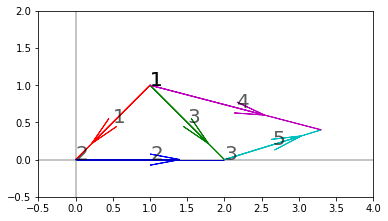

In [3]:
%matplotlib inline
import pylinearalgebra.vistools as vist

# x, y, text
node1 = [1, 1, '1']
node2 = [0, 0, '2']
node3 = [2, 0, '3']
node4 = [3.3, 0.4, '4']

fromTos = [
    # from, to, edge label (not weight here)
    (node1, node2, '1'),
    (node1, node3, '3'),
    (node2, node3, '2'),
    (node3, node4, '5'),
    (node1, node4, '4'),
]

xy = vist.XY(x_lim=(-0.5, 4), y_lim=(-0.5, 2), names=list('rgbcmy'))
for fr, to, t in fromTos:
    xy.vector(fr, to, shaft_text=t)

in the above case I have $n = 4$, which is the number of nodes;

$m = 5$ which is the number of edges;

$A_{m \ \times \ n}$ represents the graph 

edges are directional

### incidence matrix

every row corresponds to an edge; every column corresponds to
a node (from 1 to 4)

note, all the edges have no weights

$
A = \left[ \begin{array}{cccc|c}
-1 & 1 & 0 & 0 & edge 1 \\
 0 & -1& 1 & 0 & edge 2 \\
 -1& 0 & 1 & 0 & edge 3 \\
 -1& 0 & 0 & 1 & edge 4 \\
 0 & 0 & -1& 1 & edge 5
\end{array} \right]
$

#### loops and dependence

note that edge1-2-3 form a loop; their rows are dependent

row 1 + row 2 = row 3

#### sparse matrix

for large graph with not so many edges, there will a lot of
zeros - a graph/matrix that is sparse

matrices from real world problems have structures (such as
being sparsely populated)



#### the fundamental subspaces: nullspace N(A)

$N(A)$ 

are these columns independent? if so $N(A) = Z$

the nullspace tells us how to combine the columns to get zero

to solve:

$
Ax = \left[ \begin{array}{cccc}
-1 & 1 & 0 & 0 \\
 0 & -1& 1 & 0 \\
 -1& 0 & 1 & 0 \\
 -1& 0 & 0 & 1 \\
 0 & 0 & -1& 1 
\end{array} \right]
\begin{bmatrix}x_{1} \\ x_{2} \\ x_{3} \\ x_{4}\end{bmatrix}
= 0 \\
\begin{bmatrix}
x_{2} - x_{1} \\
x_{3} - x_{2} \\
x_{3} - x_{1} \\
x_{4} - x_{1} \\
x_{4} - x_{3} \end{bmatrix} = \left[ 0 \right]
$


`x = {x1, x2, x3, x4}` are the **potentials** at the nodes

using the potentials is an important technique in applied
mathematics

there is a matrix $C$ (for current) that **connects the
potential differences to electric current**, represented by `{y1, y2, y3, y4, y5}` - these are the current on the edges (denoted $y = Ce$,
$e$ being the potential differences, see below)

this relation between current and the potential differences is
Ohm's law: <https://en.wikipedia.org/wiki/Ohm%27s_law>

the change of potential makes current happens; Ohm's law says how
much it happens


solving $Ax = 0$ is to find their **potential differences** (denoted
$e = Ax$)


one of the solution is `{1, 1, 1, 1}` - a constant potential

it is a basis of nullspace, its multiples span the nullspace

$
x = c \ \begin{bmatrix}
1 \\
1 \\
1 \\
1  \end{bmatrix}
$

a line in $R^4$ space, $dimN(A) = 1$

$A$ has a rank of 3 (num columns - dependent/free columns)


#### what does this mean for the application

the potential differences are what make things flow (electric
current, water flow, social networking etc.)

but there is only a constant potential

nothing will move if all the potentials are the same (constants)

#### moving on the nullspace of $A^{T}$

$A^{T}y = 0$, knowing that $dimN(A^{T}) = m -r = 5 - 3 = 2$

----

in the electric current model (see above), $A^{T}y = 0$ is
th Kirchoff's current law (KCL): <https://en.wikipedia.org/wiki/Kirchhoff%27s_circuit_laws>

the RHS is zero because there is no current source - if there is
the equation becomes $A^{T}y = f$

----

what are its basis in $N(A^{T})$

$
A^{T} = 
\begin{bmatrix}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 &0 & 0& 0 \\
0 & 1 & 1& 0 & -1\\
0 & 0 & 0 &1 & 1
\end{bmatrix}
\begin{bmatrix}
y_{1} \\ y_{2} \\ y_{3} \\ y_{4} \\ y_{5}
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0\\ 0
\end{bmatrix}
$

the practical application of finding its basis can be see in KCL, 
Kirchoff's current law

plugin vector $y$ in to the matrix,

here is the first row of the equations:

$
-y_{1} - y_{3} - y_{4} = 0
$

the physical meaning of this equation is: these currents `y1, y3, y4`
are **leaving node-1** (the first row represents node-1), and the
**net flow is 0**



here is the 2nd row:

$
y_{1} - y_{2} = 0
$

the current flowing in and the current flowing out cancels each
other

moving on to the 3rd row

$
y_{2} + y_{3} - y_{5} = 0
$

the in-current `y2, y3` and out-current `y5` cancel each other

similar analysis applies to the 4th row.... 


finding the special solution here can be done by analysing 
the graph (using the current law) or by elimination;

by elimination, $A^{T}$ can be reduced to a form where
the 4th row is $Z$ (because the rank is 3)

it has 3 pivots and $dimN(A^{T}) = m - r = 5 - 3 = 2$, it is a 
2-dimensional space, it has 2 basis



here are these 2 basis

MY NOTE: 

Gilbert didn't explain why the basis can have negative
component, and what does a negative component mean - basically, 
because the original edge has directions, as encoded in $A$ (
edge leaving a node is `-1`; edge entering a node is `1`), a 
positive number `1` in the basis means the current **follows**
the direction of the edge, wheraas **a negative one goes in the
opposite direction**

this is why he kept saying "there is a loop" - the loop is 
formed by applying the basis (the solution) on top of the
edge directions

$
\begin{bmatrix}
1 \\ 1 \\ -1 \\ 0 \\ 0 
\end{bmatrix},
\begin{bmatrix}
0 \\ 0 \\  1 \\ -1 \\ 1
\end{bmatrix}
$

these two basis correspond to the 2 loops of the electric
current that flow through the graph

there is also seemingly a "3rd loop" - the outer loop, and
the solution correspond to this loop is 

$
\begin{bmatrix}
1 \\ 1 \\ 0 \\ -1 \\ 1
\end{bmatrix}
$

it is actually the combination of the previous 2 solutions

meaning this solution is not the basis as it is not independent

later on Gilbert gave another example graph that emphasize this 
relation

#### the row space $C(A^{T})$

rank = 3, 2 free columns

$
\begin{bmatrix}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 &0 & 0& 0 \\
0 & 1 & 1& 0 & -1\\
0 & 0 & 0 &1 & 1
\end{bmatrix}
$

observe that column-3 is not independent (it is a combination of
col-1 and col-2) because col-1, col-2 and 3 form a loop

therefore the pivot columns are `col1, col2, col4`

**these pivot columns form a smaller graph that does not have a loop,
therefore they form a tree**

#### dimension and the number of loops

$dimN(A^{T}) = m - r$, which is the number of loops `#loops`

`#loops = #edges - (#nodes - 1)`

which can be further transformed to this formula

`#nodes - #edges + #loops = 1`

(the space of) nodes are 0 dimensional, they are isolated

(the space of) edges are 1 dimensional, lines that connect nodes

(the space of) loops are 2 dimensional, areas that are formed by loops

this is **Euler's formula**: <https://en.wikipedia.org/wiki/Planar_graph#Euler's_formula>

## Summary: Applied Mathematics Equations

$
e = Ax \\
y = Ce \\
A^{T}y = 0 \\ 
A^{T}y = f
$

plug the first 2 equations into the 4th one, I get:

$
A^{T}CAx = f
$

the balance equation

and the matrix of $A^{T}CA$ is symmetric